In [105]:
# To send data(images) to the models and get the predictions back

import requests

url = "http://127.0.0.1:8000/predict/kidney-stone"    # specify the endpoint

files = {"file": open("test images/kidney.jpg", "rb")}  # specify the img

response = requests.post(url, files=files)

print(response.json())

{'detected_image': 'iVBORw0KGgoAAAANSUhEUgAAAoAAAAKACAIAAACDr150AAEAAElEQVR4nOy9yZobV5IlbNcdEQEEEEAMDE5iakops7Kq+6tN1wP0w/UT9bJXvelNd/01ZFVmSqmRFINkzJiBANzvvziyo+PXQYqSSIpKuS34BQGHD9ev2bHZwv/4H/+j2+0eHBy02+3t7e1Wq7W3t3d4eHjr1q1er7e9vZ1l2Xq9vri4WK/XnU5nxynLMjNbrVbX19ePHj365ptvHj9+/Pjx4/F4bGbL5fLm5iaEYGbr9Xo0Gs1ms1ardXBw8OGHH/73//7f//Ef/7Hf7+d5XhRFURSz2ezq6uqrr7568uRJWZa7u7u3bt26f//+nTt3er0e7qHVap2dnf3P//k//+f//J//+3//7+vrazPb3t5er9dFUVhDDb1qCiFgD5tZWZYhhFarZWa3bt36x3/8x/v37+/s7IQQdnZ2Dg4O3n333Q8++OCdd95pt9vT6fTzzz//4osvxuPxZDKZzWadTmdvb293d3e5XI7H49VqlWXZzs7Oer1eLBbz+TzP8729PbBhjDHGGELY2toCV4YQyrLM89zM8JPpdDoaja6vr6+urubzOZjr6Ojo9u3bd+7c2dvbW6/XOGY8Hs/n86IoQgjb29v7+/tHR0fHx8edTifGOB6Pnz59+uWXX37++eePHj26vLycz+dlWbbb7X6/v7+/v7+/3+12d3Z2cBtgWDNrtVrb29u8pbIscdtYK/7NZcyyLMsyfJ5lGde2LEuck0+dZVmr1dra2ooxFkWBs5kZfgXJE2PEG8FpgxO/xalwiSzLcqeyLFer1WKxKMuy1Wq12+1WqxVjXK1Wo9Ho4cOHn3322RdffLFer7H++Aon2d7eLooC/23ozVCe5zs7O51OZ3d3F7hTFMXNzc3Nzc1qtVqv11mWtdvtra0tfBVjzPO83W63220cH0IAW3GflE44P1is3W4fHh4e

In the case of <span style="color: red">skin-cancer OR kidney-stone</span>, the predicted img (is binary data, and APIs can't transfer binary data, only ASCII data)

so I encoded the img by base64 (base64 is a binary-to-text encoding scheme) before transfering it through the api,

So u need to decode the imag back to binary data

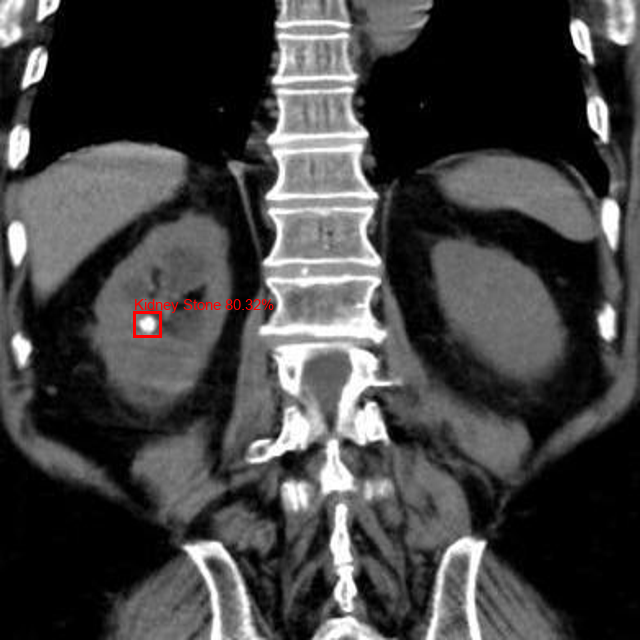

In [106]:
import base64    # for encodeing-decoding
import io
from PIL import Image

detected_image = response.json()['detected_image']
detected_image = base64.b64decode(detected_image) # decode the img
detected_image = io.BytesIO(detected_image)

detected_image = Image.open(detected_image)

detected_image